## **Linear Regression: Employee Prediction**

Analisis Employee Churn adalah sebuah studi terhadap tingkat 'churn' dari karyawan perusahaan. Employee (karyawan) dibilang 'Churn' ketika karyawan tersebut pindah kerja ke kantor lain (berhenti bekerja di kantor asal). Secara garis besar, perusahaan-perusahaan ingin bisa 'memprediksi' employee mana yang akan 'churn', supaya bisa melakukan antisipasi agar employee tersebut tidak jadi 'churn'. Mengapa? Karena...lebih besar ongkos yang dikeluarkan untuk mencari & merekrut karyawan baru, melatih mereka dari 0 lagi, ketimbang mempertahankan employee yang sudah ada. Oleh sebab itu, perusahaan-perusahaan ingin mempelajari faktor-faktor apa saja yang dapat dilihat untuk mengantisipasi 'churn' dari seorang employee. 


Setiap baris merepresentasi data dari seorang employee. 

Penjelasan setiap kolom:
- `office_distance_from_house`: jarak (dalam meter) kantor ke rumah karyawan
- `bonus_salary_percentage`: persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir
- `job_satisfaction`: tingkat kepuasan kerja karyawan
- `education_level`: tingkat pendidikan karyawan
- `overtime_hour`: lama waktu lembur rata-rata (dalam jam)
- `company_latitude`: koordinat garis lintang kantor pusat perusahaan
- `company_longitude`: koordinat garis bujur kantor pusat perusahaan
- `gender`: apabila 0, berarti perempuan, apabila 1, berarti laki-laki
- `churn`: apabila 1, berarti Churn (si karyawan pindah), apabila 0, berarti tidak Churn (karyawan tidak pindah)

### **Importing library**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### **About data**

In [37]:
# Independent variabel(x) adalah office_distance_from_house, bonus_salary_percentage, job_satisfaction, education_level, overtime_hour, gender
# Dependent variabel(y) adalah churn
df = pd.read_csv('dataset.csv', usecols=['office_distance_from_house', 'bonus_salary_percentage', 'job_satisfaction', 'education_level', 'overtime_hour', 'gender', 'churn'])
df

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,gender,churn
0,8511.0,42.51,1.0,bachelor/diploma,3.416556,0,0
1,10090.0,57.48,2.0,bachelor/diploma,2.897149,0,0
2,18652.0,41.22,2.0,bachelor/diploma,3.180264,1,1
3,13392.0,63.57,3.0,bachelor/diploma,3.429648,0,0
4,13356.0,46.16,2.0,bachelor/diploma,3.812226,1,1
...,...,...,...,...,...,...,...
1028,12972.0,73.90,2.0,bachelor/diploma,2.661765,0,0
1029,7881.0,37.09,2.0,masters degree,2.518952,0,1
1030,12003.0,66.86,1.0,masters degree,4.882591,0,0
1031,9843.0,52.03,2.0,masters degree,3.829853,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office_distance_from_house  1033 non-null   float64
 1   bonus_salary_percentage     1033 non-null   float64
 2   job_satisfaction            1033 non-null   float64
 3   education_level             1033 non-null   object 
 4   overtime_hour               1033 non-null   float64
 5   gender                      1033 non-null   int64  
 6   churn                       1033 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 56.6+ KB


In [39]:
df.education_level.unique()

array(['bachelor/diploma', 'masters degree', 'higher education',
       'high-school'], dtype=object)

In [40]:
event_strength = {
   'bachelor/diploma': 1.0,
   'masters degree': 2.0,
   'higher education': 3.0,
   'high-school': 4.0,
}
df['education_level'] = df['education_level'].apply(lambda x: event_strength[x])
df.sort_values('education_level', ascending=True)

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,gender,churn
0,8511.0,42.51,1.0,1.0,3.416556,0,0
558,6383.0,50.62,2.0,1.0,2.758004,1,1
559,11009.0,52.91,4.0,1.0,2.048636,1,0
560,6643.0,56.30,3.0,1.0,2.917020,1,0
561,18422.0,25.53,2.0,1.0,3.215196,1,1
...,...,...,...,...,...,...,...
258,18694.0,59.62,3.0,4.0,2.527929,1,0
494,24614.0,53.83,3.0,4.0,2.203556,1,0
365,17147.0,59.88,2.0,4.0,2.562299,0,1
405,15493.0,59.78,3.0,4.0,3.217649,0,0


- Seluruh data sudah dalam bentuk numerik.

In [41]:
df.shape

(1033, 7)

In [42]:
df.describe()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,gender,churn
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,10771.866409,52.125208,2.482091,1.492740,3.080121,0.499516,0.299129
std,3810.278239,13.624713,0.877098,0.563932,0.627240,0.500242,0.458098
min,583.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,8202.000000,42.600000,2.000000,1.000000,2.628310,0.000000,0.000000
50%,10530.000000,50.980000,3.000000,1.000000,3.062020,0.000000,0.000000
75%,13185.000000,61.730000,3.000000,2.000000,3.483906,1.000000,1.000000
max,24786.000000,95.700000,5.000000,4.000000,5.000000,1.000000,1.000000


### **Handling Missing Values**

In [43]:
df.isnull().sum()

office_distance_from_house    0
bonus_salary_percentage       0
job_satisfaction              0
education_level               0
overtime_hour                 0
gender                        0
churn                         0
dtype: int64

- Data tidak memiliki missing values.

### **Exploratory Data Analysis (EDA)**

In [44]:
# Recall data
df

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,gender,churn
0,8511.0,42.51,1.0,1.0,3.416556,0,0
1,10090.0,57.48,2.0,1.0,2.897149,0,0
2,18652.0,41.22,2.0,1.0,3.180264,1,1
3,13392.0,63.57,3.0,1.0,3.429648,0,0
4,13356.0,46.16,2.0,1.0,3.812226,1,1
...,...,...,...,...,...,...,...
1028,12972.0,73.90,2.0,1.0,2.661765,0,0
1029,7881.0,37.09,2.0,2.0,2.518952,0,1
1030,12003.0,66.86,1.0,2.0,4.882591,0,0
1031,9843.0,52.03,2.0,2.0,3.829853,0,0


*Karyawan pindah*

In [45]:
# Membuat tabel kategori hanya karyawan yang pindah
churn_1 = df[df.churn == 1]
churn_1

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,gender,churn
2,18652.0,41.22,2.0,1.0,3.180264,1,1
4,13356.0,46.16,2.0,1.0,3.812226,1,1
17,9424.0,37.46,3.0,1.0,1.832275,0,1
25,22507.0,26.81,2.0,1.0,3.537014,1,1
26,17671.0,51.62,2.0,1.0,2.375723,1,1
...,...,...,...,...,...,...,...
1021,14776.0,57.74,2.0,1.0,3.030431,1,1
1022,20218.0,12.89,2.0,1.0,3.214769,0,1
1024,14265.0,43.72,1.0,1.0,3.665780,0,1
1027,14480.0,34.52,1.0,1.0,3.869863,0,1


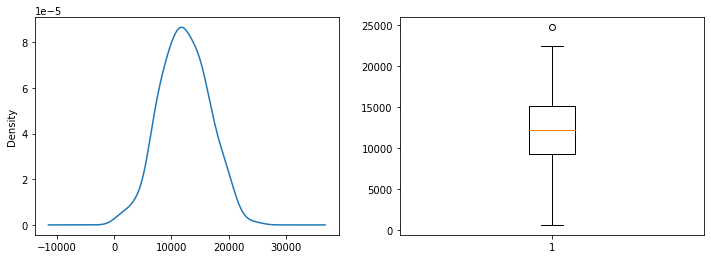

In [46]:
# Distribusi dari office_distance_from_house
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
churn_1['office_distance_from_house'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(churn_1['office_distance_from_house'])
plt.show()

- Density dari distribusi jarak (dalam meter) kantor ke rumah karyawan yang pindah berada di angka 12000an
- Data memiliki outliers

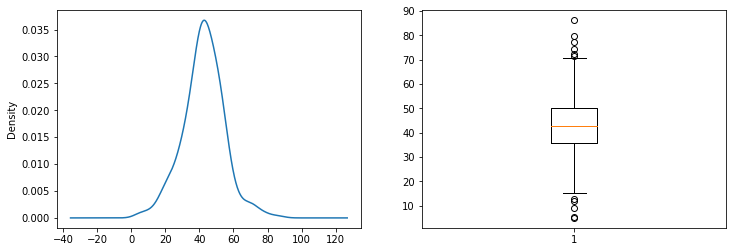

In [47]:
# Distribusi dari bonus_salary_percentage
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
churn_1['bonus_salary_percentage'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(churn_1['bonus_salary_percentage'])
plt.show()

- Density dari distribusi persentase bonus gaji yang diterima karyawan yang pindah dalam 6 bulan terakhir berada di angka 42an
- Data memiliki banyak outliers

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


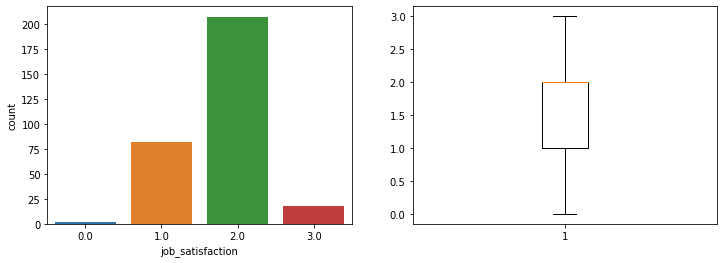

In [48]:
# Distribusi dari job_satisfaction
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(churn_1['job_satisfaction'])
f.add_subplot(1,2,2)
plt.boxplot(churn_1['job_satisfaction'])
plt.show()

- Sebagian besar karyawan yang pindah memiliki tingkat kepuasan kerja 2 dan 1.
- Data tidak memiliki outliers.

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


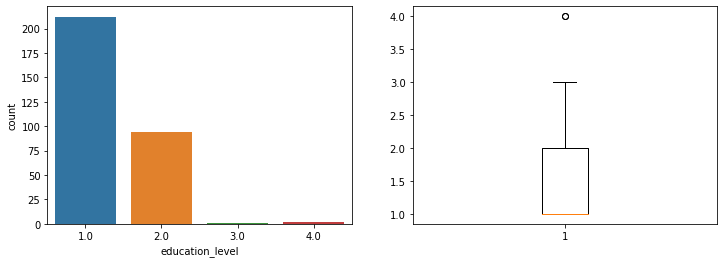

In [49]:
# Distribusi dari education_level
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(churn_1['education_level'])
f.add_subplot(1,2,2)
plt.boxplot(churn_1['education_level'])
plt.show()

- Sebagian besar karyawan yang pindah memiliki tingkat pendidikan 1 dan 2.
- Data memiliki outliers.

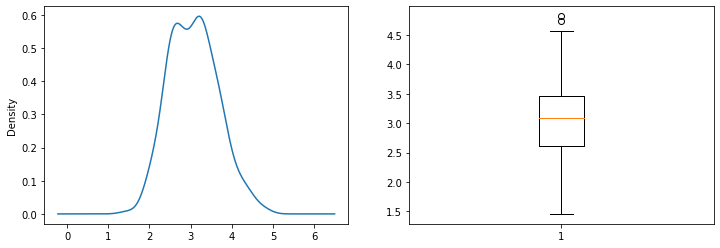

In [50]:
# Distribusi dari overtime_hour
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
churn_1['overtime_hour'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(churn_1['overtime_hour'])
plt.show()

- Density dari distribusi lama waktu lembur rata-rata (dalam jam) karyawan yang pindah berada di angka 3 jam an.
- Data memiliki outliers.

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


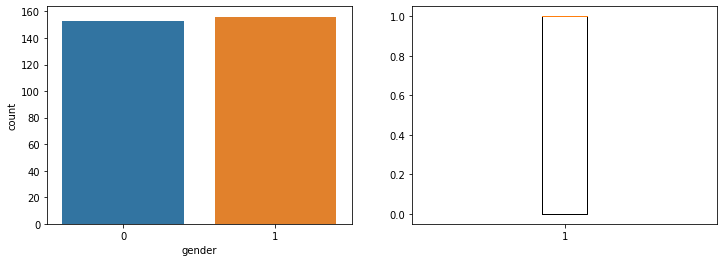

In [51]:
# Distribusi dari gender
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(churn_1['gender'])
f.add_subplot(1,2,2)
plt.boxplot(churn_1['gender'])
plt.show()

- Karyawan yang pindah memiliki gender yang sebanding nilainya.
- Data tidak memiliki outliers

*Karyawan tidak pindah*

In [52]:
# Membuat tabel kategori hanya karyawan yang tidak pindah
churn_0 = df[df.churn == 0]
churn_0

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,gender,churn
0,8511.0,42.51,1.0,1.0,3.416556,0,0
1,10090.0,57.48,2.0,1.0,2.897149,0,0
3,13392.0,63.57,3.0,1.0,3.429648,0,0
5,8637.0,45.40,2.0,2.0,2.957464,1,0
6,10121.0,59.67,5.0,1.0,2.166112,1,0
...,...,...,...,...,...,...,...
1026,12403.0,71.02,2.0,1.0,3.370856,1,0
1028,12972.0,73.90,2.0,1.0,2.661765,0,0
1030,12003.0,66.86,1.0,2.0,4.882591,0,0
1031,9843.0,52.03,2.0,2.0,3.829853,0,0


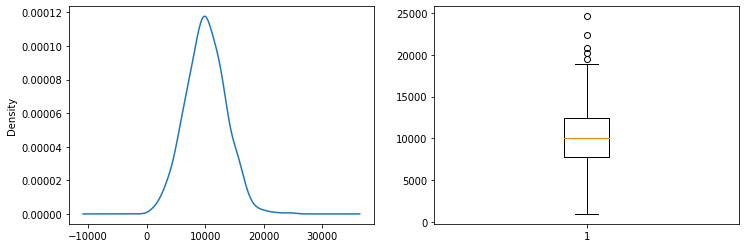

In [53]:
# Distribusi dari office_distance_from_house
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
churn_0['office_distance_from_house'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(churn_0['office_distance_from_house'])
plt.show()

- Density dari distribusi jarak (dalam meter) kantor ke rumah karyawan yang tidak pindah berada di angka 10000an
- Data memiliki banyak outliers

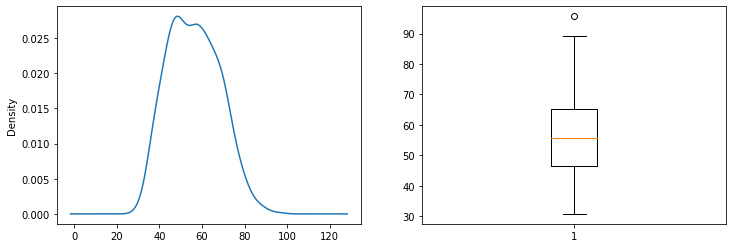

In [54]:
# Distribusi dari bonus_salary_percentage
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
churn_0['bonus_salary_percentage'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(churn_0['bonus_salary_percentage'])
plt.show()

- Density dari distribusi persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir berada di angka 55an
- Data memiliki outliers

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


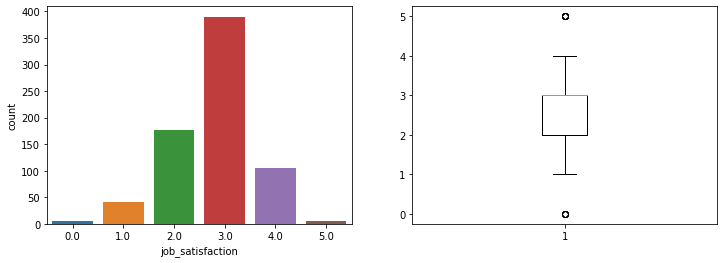

In [55]:
# Distribusi dari job_satisfaction
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(churn_0['job_satisfaction'])
f.add_subplot(1,2,2)
plt.boxplot(churn_0['job_satisfaction'])
plt.show()

- Sebagian besar karyawan yang tidak pindah memiliki tingkat kepuasan kerja 2 dan 3.
- Data memiliki outliers

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


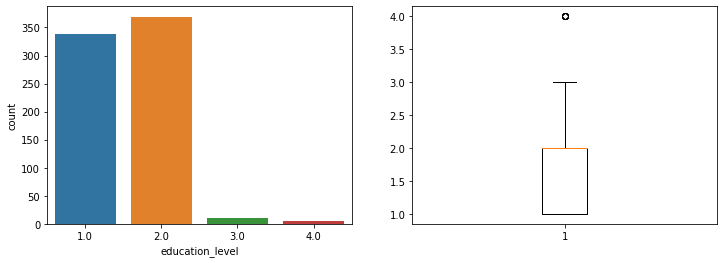

In [56]:
# Distribusi dari education_level
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(churn_0['education_level'])
f.add_subplot(1,2,2)
plt.boxplot(churn_0['education_level'])
plt.show()

- Sebagian besar karyawan yang pindah memiliki tingkat pendidikan 1 dan 2.
- Data memiliki outliers

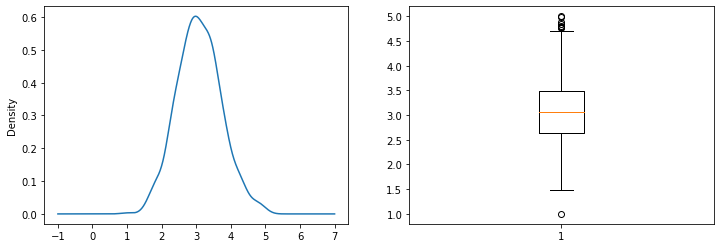

In [57]:
# Distribusi dari overtime_hour
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
churn_0['overtime_hour'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(churn_0['overtime_hour'])
plt.show()

- Density dari distribusi lama waktu lembur rata-rata (dalam jam) karyawan yang tidak pindah berada di angka 3 jam an.
- Data memiliki outliers.

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


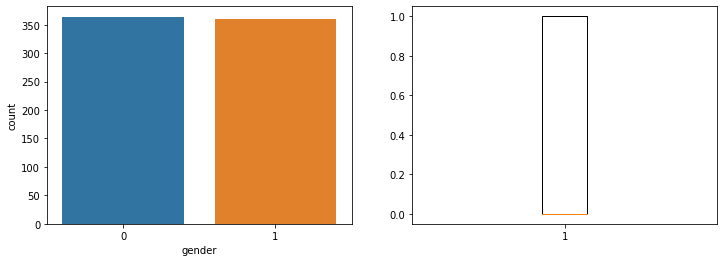

In [58]:
# Distribusi dari gender
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(churn_0['gender'])
f.add_subplot(1,2,2)
plt.boxplot(churn_0['gender'])
plt.show()

- Karyawan memiliki gender yang sebanding nilainya.
- Data tidak memiliki outliers

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x288 with 0 Axes>

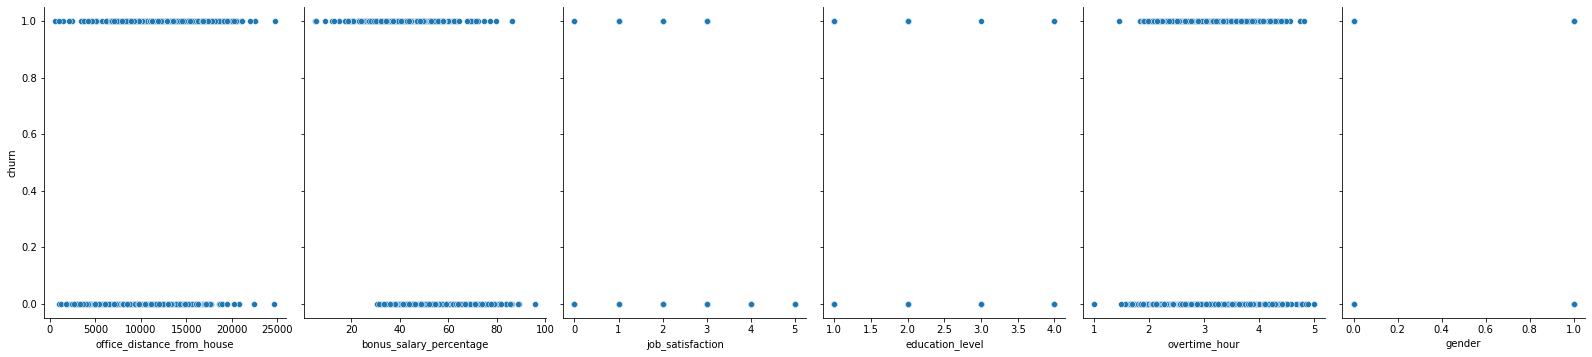

In [59]:
# Hubungan antara independent dan dependent variabel
plt.figure(figsize=(12, 4))
sns.pairplot(data=df, x_vars=['office_distance_from_house', 'bonus_salary_percentage', 'job_satisfaction', 'education_level', 'overtime_hour', 'gender'], y_vars=['churn'], size=5, aspect=0.75)
plt.show()

In [60]:
# Tabel korelasi dari independent dan dependent variabel
df.corr().style.background_gradient().set_precision(2)

C:\Users\Nanda\AppData\Local\Temp\ipykernel_10736\3180104771.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,gender,churn
office_distance_from_house,1.00,-0.05,-0.13,-0.27,-0.02,-0.03,0.26
bonus_salary_percentage,-0.05,1.00,0.15,-0.08,0.10,-0.04,-0.46
job_satisfaction,-0.13,0.15,1.00,0.11,-0.45,-0.03,-0.52
education_level,-0.27,-0.08,0.11,1.00,0.01,0.01,-0.19
overtime_hour,-0.02,0.10,-0.45,0.01,1.00,-0.00,-0.01
gender,-0.03,-0.04,-0.03,0.01,-0.00,1.00,0.01
churn,0.26,-0.46,-0.52,-0.19,-0.01,0.01,1.00


- Nilai korelasi gender hampir mendekati nol yang menandakan bahwa gender tidak mempengaruhi perpindahan karyawan.

### **Modelling**

In [61]:
# Recall data
df

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,gender,churn
0,8511.0,42.51,1.0,1.0,3.416556,0,0
1,10090.0,57.48,2.0,1.0,2.897149,0,0
2,18652.0,41.22,2.0,1.0,3.180264,1,1
3,13392.0,63.57,3.0,1.0,3.429648,0,0
4,13356.0,46.16,2.0,1.0,3.812226,1,1
...,...,...,...,...,...,...,...
1028,12972.0,73.90,2.0,1.0,2.661765,0,0
1029,7881.0,37.09,2.0,2.0,2.518952,0,1
1030,12003.0,66.86,1.0,2.0,4.882591,0,0
1031,9843.0,52.03,2.0,2.0,3.829853,0,0


In [62]:
# Variabel x dan y
x = df.drop(columns='churn')
y = df['churn']
# Split data menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
# Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(826, 6)
(826,)
(207, 6)
(207,)


In [63]:
lin_reg = LinearRegression()
# Train model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)
# Nilai slope/koefisien (m) dan intercept (b)
print("m =", lin_reg.coef_)
print("b =", lin_reg.intercept_)

m = [ 1.66875442e-05 -1.28133257e-02 -2.68932317e-01 -9.74966482e-02
 -1.39106639e-01 -8.98870690e-05]
b = 2.0118463828758366


In [64]:
coef_dict = {'features':x.columns, 'coef_value':lin_reg.coef_}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,office_distance_from_house,0.000017
1,bonus_salary_percentage,-0.012813
2,job_satisfaction,-0.268932
3,education_level,-0.097497
4,overtime_hour,-0.139107
5,gender,-0.000090


- Nilai slope/koefisien (m) = coef_value
- Dari nilai m dan b, jika dimasukan ke dalam rumus menjadi:  
Y = 0.000017x1 - 0.012813 - 0.268932x3 - 0.097497x4 - 0.139107x5 - 0.000090x6 + 2.0118463828758366

In [65]:
y_pred = lin_reg.predict(x_test)
# Accuracy score model menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.472030180963375

- Model mendapatkan accuracy score sebesar 47.2%

### **Prediction**

*Apabila x < 0.5 maka karyawan diprediksi tidak akan pindah, apabila x > 0.5 maka karyawan diprediksi akan pindah.

Memprediksi apakah karyawan akan pindah atau tidak (berdasarkan data karyawan yang pindah) sesuai dengan kriteria berikut:  
1. Jarak (dalam meter) kantor ke rumah karyawan = 12000
2. Persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir = 42
3. Tingkat kepuasan kerja karyawan = 2
4. Tingkat pendidikan karyawan = 1
5. Lama waktu lembur rata-rata (dalam jam) = 3
6. Gender; apabila 0, berarti perempuan, apabila 1, berarti laki-laki = 1

*Apabila 0 < x < 0.5 maka karyawan diprediksi tidak akan pindah, apabila 0.5 < x < 1 maka karyawan diprediksi akan pindah.

In [66]:
# Prediksi karyawan pindah
lin_reg.predict([[12000,42,2,1,3,1]])

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.62116615])

- Hasilnya adalah 0.62116615 yang berarti karyawan tersebut diprediksi akan pindah.

Memprediksi apakah karyawan akan pindah atau tidak (berdasarkan data karyawan yang tidak pindah) sesuai dengan kriteria berikut:  
1. Jarak (dalam meter) kantor ke rumah karyawan = 10000
2. Persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir = 55
3. Tingkat kepuasan kerja karyawan = 2
4. Tingkat pendidikan karyawan = 2
5. Lama waktu lembur rata-rata (dalam jam) = 3
6. Gender; apabila 0, berarti perempuan, apabila 1, berarti laki-laki = 0

In [67]:
# Prediksi karyawan pindah
lin_reg.predict([[10000,55,2,2,3,0]])

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.32381106])

- Hasilnya adalah 0.32381106 yang berarti karyawan tersebut diprediksi tidak akan pindah.

Berikut ini adalah code untuk penginputan oleh user:

In [68]:
print("="*47)
print("Prediksi Apakah Karyawan Akan Pindah atau Tidak")
print("="*47)
s = "y"
while s == "y":
    print("-"*47)
    a = float(input("Jarak (dalam meter) kantor ke rumah karyawan ="))
    b = float(input("Persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir ="))
    c = float(input("Tingkat kepuasan kerja karyawan ="))
    d = float(input("Tingkat pendidikan karyawan ="))
    e = float(input("Lama waktu lembur rata-rata (dalam jam) ="))
    f = float(input("Gender; apabila 0, berarti perempuan, apabila 1, berarti laki-laki ="))
    x = lin_reg.predict([[a,b,c,d,e,f]])
    print("Jarak (dalam meter) kantor ke rumah karyawan =", a)
    print("Persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir =", b)
    print("Tingkat kepuasan kerja karyawan =", c)
    print("Tingkat pendidikan karyawan =", d)
    print("Lama waktu lembur rata-rata (dalam jam) =", e)
    print("Gender; apabila 0, berarti perempuan, apabila 1, berarti laki-laki =", f)
    if x < 0.5:
        print(">>> Hasilnya adalah", x, "yang berarti karyawan tersebut diprediksi tidak akan pindah.")
    else:
        print(">>> Hasilnya adalah", x, "yang berarti karyawan tersebut diprediksi akan pindah.")
    s = input("Apakah anda ingin memprediksi lagi (y/t): ")
if s == "t":
    print("-"*47)
    print("Prediksi telah selesai.")

Prediksi Apakah Karyawan Akan Pindah atau Tidak
-----------------------------------------------


C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Jarak (dalam meter) kantor ke rumah karyawan = 13000.0
Persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir = 23.0
Tingkat kepuasan kerja karyawan = 4.0
Tingkat pendidikan karyawan = 3.0
Lama waktu lembur rata-rata (dalam jam) = 3.0
Gender; apabila 0, berarti perempuan, apabila 1, berarti laki-laki = 0.0
>>> Hasilnya adalah [0.14853883] yang berarti karyawan tersebut diprediksi tidak akan pindah.
-----------------------------------------------


C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Jarak (dalam meter) kantor ke rumah karyawan = 2000.0
Persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir = 34.0
Tingkat kepuasan kerja karyawan = 2.0
Tingkat pendidikan karyawan = 1.0
Lama waktu lembur rata-rata (dalam jam) = 3.0
Gender; apabila 0, berarti perempuan, apabila 1, berarti laki-laki = 1.0
>>> Hasilnya adalah [0.55679731] yang berarti karyawan tersebut diprediksi akan pindah.
-----------------------------------------------
Prediksi telah selesai.


In [69]:
!jupyter nbconvert --to html LinearRegression_EmployeePrediction.ipynb

[NbConvertApp] Converting notebook LinearRegression_EmployeePrediction.ipynb to html
[NbConvertApp] WARNING | Non-unique cell id 'a92973f2' detected. Corrected to 'c678fcd5'.
[NbConvertApp] WARNING | Non-unique cell id '0a921f88' detected. Corrected to '3eb00d62'.
[NbConvertApp] Writing 901955 bytes to LinearRegression_EmployeePrediction.html
